### **EDA: análisis bivariante**

Este notebook implementa **el análisis bivariante del EDA** sobre los tres datasets limpios del proyecto. Y el objetivo esencial es demostrar si las hipótesis primarias y secundarias de nuestro análisis son relevantes para elegir destino para un nómada digital o, en un sentido diferente, qué elementos serían relevantes para una ciudad o país para convertirse en destino para nómadas digitales.

#### **Datasets para el EDA**

1. Cost of Living: `cost-of-living-variables-agregadas.csv` 
2. Circleloop: `digital-nomad-index-cicleloop-clean.csv`
3. Movingto: `digital-nomad-index-movingto-clean.csv`

#### **Hipótesis a validar**

Básicamente es responder las siguientes preguntas: 

##### Hipótesis primarias

- **Hipótesis 1**: coste de vida medio --> ¿los mejores destinos siempre son los que menos coste mensual exigen?
- **Hipótesis 2**: salarios vs coste --> ¿la relación entre los salarios y el coste es clave para ser un buen destino?
- **Hipótesis 3**: conectividad para trabajar --> ¿cuanto más velocidad de conexión a menos precio, mejor destino nómada digital?

##### Hipótesis secundarias

- **Hipótesis 4**: la variable vivienda --> ¿el alquiler de vivienda es una razón determinante por encima de alimentación y transporte?
- **Hipótesis 5**: más por menos dinero --> ¿hay países que ofrecen mejores condiciones generales por menos coste mensual?
- **Hipótesis 6**: bienestar social --> ¿los países con buen índice de felicidad atraen más nómadas digitales?
- **Hipótesis 7**: outliers estratégicos --> ¿ciudades y países fuera de rango son buenos destinos para los nómadas?
- **Hipótesis 8**: seguridad --> la seguridad es un elemento decisivo en la elección, incluso con costes elevados
- **Hipótesis 9**: facilidad de visado --> la accesibilidad legal a los países es una variable que afecta al ránking de destinos

#### **Pasos a seguir**

1. Importar librerías y cargar los tres datasets procedentes del ETL.
2. Correlación general mediante heatmap: todas las variables vs el resto de variables.
3. Validaciones de las hipótesis para determinar cómo elegir destino si eres nómada digital o que hacer para ser un buen destino
4. Conclusiones generales del análisis.

### **1. Cargamos las librerías y los datasets limpios procedentes del ETL**

In [ ]:
# Cargamos las librerías que vamos a necesitar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.copy_on_write = True

# Configuración de las visualizaciones del análisis univariante:
# 1. Estilos de Matplotlib y Seaborn
# 2. Paleta estándar viridis

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Cargamos todos los datasets totalmente limpios del proceso de ETL

df_cost = pd.read_csv("./data/variables-agregadas-cost-of-living.csv")
df_circleloop = pd.read_csv("./data/digital-nomad-index-cicleloop-clean.csv")
df_movingto = pd.read_csv("./data/digital-nomad-index-movingto-clean.csv")

# Cargamos los datasets para saber si todo está correcto

df_cost.head(10) # Selección de variables originales y agregadas de Cost of Living

,city_name,country_name,meal_inexpensive_restaurant,meal_midrange_restaurant_2p,mcmeal_fastfood,beer_domestic_restaurant_0_5l,beer_imported_restaurant_0_33l,cappuccino_restaurant,soda_restaurant_0_33l,water_restaurant_0_33l,...,avg_net_salary,mortgage_interest_rate_20y,data_quality_flag,continent,nomad_housing_cost,basic_basket_index,daily_meal_cost,monthly_nomad_cost,local_purchasing_power,housing_salary_ratio
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,2689.62,3.47,1,Asia,650.030,4.631667,11.61,1209.990,2.222845,24.168098
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,1419.87,5.03,1,Asia,830.905,1.995000,9.67,1147.345,1.237527,58.519794
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,1211.68,5.19,1,Asia,425.365,1.572500,7.67,692.370,1.750047,35.105391
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,640.81,7.96,1,Asia,408.225,1.078333,6.16,590.785,1.084675,63.704530
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,586.46,8.06,1,Asia,182.575,1.047500,6.68,391.890,1.496491,31.131705
5,Dhaka,Bangladesh,1.95,11.71,4.88,5.85,5.12,1.95,0.29,0.16,...,280.73,9.26,1,Asia,114.940,1.193333,3.90,286.730,0.979074,40.943255
6,Osaka,Japan,7.45,48.39,5.36,3.35,3.72,3.28,1.09,0.81,...,2322.46,1.49,1,Asia,525.550,3.302500,10.73,1035.305,2.243262,22.629023
7,Jakarta,Indonesia,2.59,22.69,3.57,2.06,3.24,2.23,0.61,0.27,...,509.12,9.05,1,Asia,391.510,1.765000,4.82,643.550,0.791112,76.899356
8,Shenzhen,China,4.27,28.47,4.98,1.14,3.99,4.20,0.47,0.34,...,1572.22,4.99,1,Asia,586.910,1.829167,8.47,890.265,1.766013,37.330017
9,Kinshasa,Congo,15.11,42.63,10.08,1.74,2.50,4.35,2.78,0.84,...,400.00,19.33,0,Africa,1362.500,4.215000,19.46,2664.840,0.150103,340.625000


In [2]:
df_circleloop.head(10) # Dataset de Nomad Index de Circleloop

,rank,country,broadband_speed_mbps,mobile_speed_mbps,broadband_cost,monthly_rent,happiness_index,migrant_population_pct,remote_jobs_searches,digital_nomad_score
0,1,Canada,149.35,84.54,43.77,1111.50,7.23,21.3,83900,74.35
1,2,UK,76.49,41.72,44.83,1084.59,7.17,14.1,68400,63.43
2,3,Romania,188.55,41.48,10.23,380.25,6.12,2.4,10980,62.28
3,4,Sweden,158.73,56.64,49.72,1035.45,7.35,20.0,3490,61.54
4,5,Denmark,179.81,66.68,60.55,1239.03,7.65,12.5,1080,61.49
5,6,France,177.93,50.45,34.91,886.86,6.66,12.8,5360,60.80
6,7,Netherlands,125.82,88.13,53.27,1419.21,7.45,13.4,3440,60.27
7,8,Australia,58.52,88.35,60.71,1343.16,7.22,30.0,17600,60.16
8,9,Switzerland,186.40,73.85,90.52,1807.65,7.56,29.9,3840,60.15
9,10,Germany,120.13,49.67,36.09,964.08,7.08,15.7,12720,60.00


In [3]:
df_movingto.head(10) # Dataset de Nomad Index de Circleloop

,rank,country,overall_score,internet_speed,cost_of_living,safety,visa_ease,quality_of_life,taxes,tax_free_period
0,1,Portugal,92,90,85,95,95,95,NHR 20%,10 years
1,2,Estonia,91,95,75,90,98,92,0-20%,183 days/year
2,3,Georgia,90,85,88,82,100,80,1%,183 days/year
3,4,Spain,89,88,80,92,92,94,24%,183 days/year
4,5,Thailand,88,85,95,80,90,88,0-35%,183 days/year
5,6,Mexico,87,82,90,75,94,86,1.92-35%,183 days/year
6,7,Czech Republic,86,87,78,88,85,90,15%,183 days/year
7,8,Malaysia,85,80,92,85,90,85,0-30%,182 days/year
8,9,Croatia,84,84,76,88,88,89,24%,1 year
9,10,Costa Rica,83,79,85,80,90,88,0-25%,183 days/year


#### **Las variables que tenemos disponibles y son relevantes para confirmar las hipótesis son:**

##### Cost of Living: variables agregadas del dataset
- `nomad_housing_cost`
- `basic_basket_index`
- `daily_meal_cost`
- `monthly_nomad_cost`
- `local_purchasing_power`
- `cappuccino_index`
- `housing_salary_ratio`

##### Nomad Index Circleloop: variables clave del dataset
- `digital_nomad_score`
- `broadband_speed_mbps`
- `happiness_index`
- `monthly_rent`

##### Nomad Index Movingto: variables clave del dataset
- `overall_score`
- `safety`
- `visa_ease`
- `cost_of_living`

In [7]:
# El objetivo es mergear todas las variables y los tres dataset en un único dataset
# Mergearlo nos ayuda a las comparativas posteriores de variables para la validación de hipótesis
# Agrupamos todo el dataset por país haciendo medianas de las variables entre todas las ciudades por país
# Para eso es necesario previamente que las columnas de país se llamen igual en todos los datasets

df_circleloop = df_circleloop.rename(columns={'country': 'country_name'}) 
df_movingto = df_movingto.rename(columns={'country': 'country_name'}) 
df_circleloop.head(5)

,rank,country_name,broadband_speed_mbps,mobile_speed_mbps,broadband_cost,monthly_rent,happiness_index,migrant_population_pct,remote_jobs_searches,digital_nomad_score
0,1,Canada,149.35,84.54,43.77,1111.50,7.23,21.3,83900,74.35
1,2,UK,76.49,41.72,44.83,1084.59,7.17,14.1,68400,63.43
2,3,Romania,188.55,41.48,10.23,380.25,6.12,2.4,10980,62.28
3,4,Sweden,158.73,56.64,49.72,1035.45,7.35,20.0,3490,61.54
4,5,Denmark,179.81,66.68,60.55,1239.03,7.65,12.5,1080,61.49


In [8]:
df_movingto.head(5)

,rank,country_name,overall_score,internet_speed,cost_of_living,safety,visa_ease,quality_of_life,taxes,tax_free_period
0,1,Portugal,92,90,85,95,95,95,NHR 20%,10 years
1,2,Estonia,91,95,75,90,98,92,0-20%,183 days/year
2,3,Georgia,90,85,88,82,100,80,1%,183 days/year
3,4,Spain,89,88,80,92,92,94,24%,183 days/year
4,5,Thailand,88,85,95,80,90,88,0-35%,183 days/year


In [32]:
# Creamos un diccionario con todos el listado de variables de cada uno de los datasets

df_vars_dict = {
    'df_cost': [
        'nomad_housing_cost', 'basic_basket_index', 'daily_meal_cost', 
        'monthly_nomad_cost', 'local_purchasing_power', 
        'housing_salary_ratio'
    ],
    'df_circleloop': [
        'digital_nomad_score', 
        'broadband_speed_mbps', 
        'mobile_speed_mbps',
        'broadband_cost',
        'happiness_index', 
        'monthly_rent'
    ],
    'df_movingto': [
        'overall_score', 'safety', 'visa_ease', 'cost_of_living'
    ]
}

df_cost_by_country = df_cost.groupby('country_name').agg({
    'continent': 'first',
    **{col: 'median' for col in df_vars_dict['df_cost']}
    }).reset_index()

# Agrupamos todo el dataset por país haciendo medianas de las variables entre todas las ciudades por país

df_circleloop_by_country = df_circleloop.groupby('country_name').agg({
    **{col: 'median' for col in df_vars_dict['df_circleloop']}
    }).reset_index()

# Agrupamos todo el dataset por país haciendo medianas de las variables entre todas las ciudades por país

df_movingto_by_country = df_movingto.groupby('country_name').agg({
    **{col: 'median' for col in df_vars_dict['df_movingto']}
    }).reset_index()


# Mergeamos primero el dataset de Cost of Living con Circleloop y lo instanciamos para tener ese dataset intermedio

df_cost_circleloop = df_cost_by_country.merge(df_circleloop_by_country, on='country_name', how='outer')
df_cost_circleloop.head(5)


,country_name,continent,nomad_housing_cost,basic_basket_index,daily_meal_cost,monthly_nomad_cost,local_purchasing_power,housing_salary_ratio,digital_nomad_score,broadband_speed_mbps,mobile_speed_mbps,broadband_cost,happiness_index,monthly_rent
0,Afghanistan,Asia,52.2625,0.761250,2.195,393.2975,0.515661,30.370149,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,155.0650,1.295833,5.550,369.5100,0.978007,43.021030,38.97,41.52,56.44,25.80,4.88,331.11
2,Algeria,Africa,113.3200,1.225417,2.220,271.4325,0.941333,43.519336,33.38,4.97,12.68,32.55,5.01,197.73
3,American Samoa,Oceania,441.6875,2.837083,24.820,1180.7200,2.874111,13.015615,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Europe,714.9500,2.264167,14.960,1176.9900,2.132278,28.487809,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Y ahora mergeamos el dataset intermedio de Cost of Living + Circleloop con Movingto

df_master = df_cost_circleloop.merge(df_movingto_by_country, on='country_name', how='outer')
df_master.head(5)

,country_name,continent,nomad_housing_cost,basic_basket_index,daily_meal_cost,monthly_nomad_cost,local_purchasing_power,housing_salary_ratio,digital_nomad_score,broadband_speed_mbps,mobile_speed_mbps,broadband_cost,happiness_index,monthly_rent,overall_score,safety,visa_ease,cost_of_living
0,Afghanistan,Asia,52.2625,0.761250,2.195,393.2975,0.515661,30.370149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,155.0650,1.295833,5.550,369.5100,0.978007,43.021030,38.97,41.52,56.44,25.80,4.88,331.11,NaN,NaN,NaN,NaN
2,Algeria,Africa,113.3200,1.225417,2.220,271.4325,0.941333,43.519336,33.38,4.97,12.68,32.55,5.01,197.73,NaN,NaN,NaN,NaN
3,American Samoa,Oceania,441.6875,2.837083,24.820,1180.7200,2.874111,13.015615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Europe,714.9500,2.264167,14.960,1176.9900,2.132278,28.487809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **3. Matriz de correlación de todas las variables entre sí con mapa de calor**

Matriz de correlación: 16 x 16


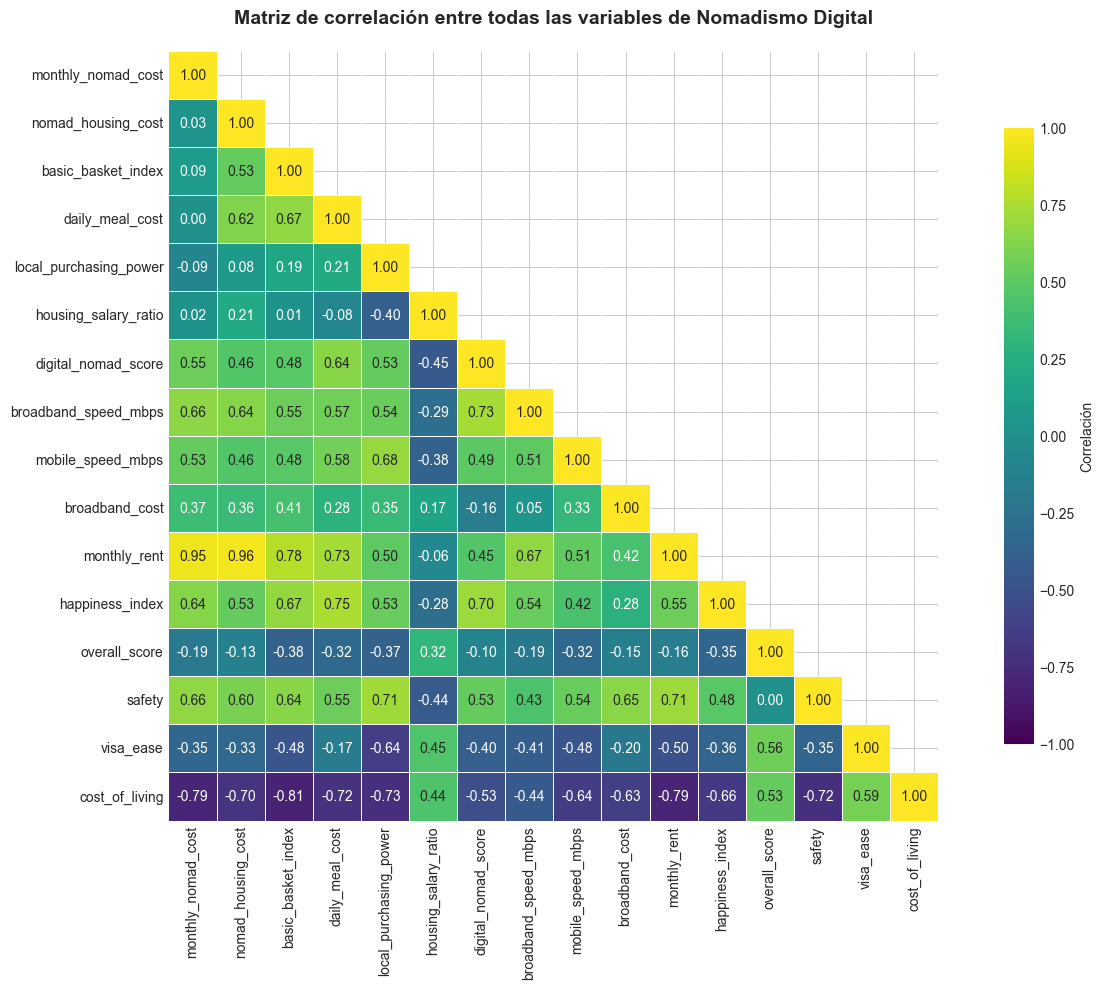

In [86]:
# Definimos un listado con todas las variables del dataset master

master_vars_list = [
    # Indices de Feature Engineering (Cost of Living)
    'monthly_nomad_cost',
    'nomad_housing_cost', 
    'basic_basket_index',
    'daily_meal_cost',
    'local_purchasing_power',
    'housing_salary_ratio',
    # Variables Circleloop
    'digital_nomad_score',
    'broadband_speed_mbps',
    'mobile_speed_mbps',
    'broadband_cost',
    'monthly_rent',
    'happiness_index',
    # Variables Movingto
    'overall_score',
    'safety',
    'visa_ease',
    'cost_of_living'
]

# Calcular la matriz en función del Coeficiente de Correlación de Pearson

df_heatmap = df_master[master_vars_list].corr(method='pearson')

print(f"Matriz de correlación: {df_heatmap.shape[0]} x {df_heatmap.shape[1]}")

# Heatmap de correlaciones

fig, ax = plt.subplots(figsize=(14, 10))

mask = np.triu(np.ones_like(df_heatmap, dtype=bool), k=1)

sns.heatmap(
    df_heatmap,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='viridis',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8, 'label': 'Correlación'},
    ax=ax
)

ax.set_title('Matriz de correlación entre todas las variables de Nomadismo Digital', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [47]:
# Top correlaciones con digital_nomad_score

vars_vs_nomad_score = df_heatmap['digital_nomad_score'].drop('digital_nomad_score').sort_values(key=abs, ascending=False)

print("¿Cuáles son las variables de cada detino que mejor puntúan para los nómadas digitales?:")
print("---------------------------------------------------------------------------------------")
for var, corr in vars_vs_nomad_score.items():
    signo = "+" if corr > 0 else ""
    fuerza = "correlación fuerte" if abs(corr) > 0.5 else "correlación moderada" if abs(corr) > 0.3 else "correlación débil"
    print(f"  {var:<25} {signo}{corr:.2f} ({fuerza})")
print("----------------------------------------------------------------------------------------")
print("La velocidad de internet es la que tiene un mayor grado de correlación a priori")
print("Después vienen índice de felicidad, coste de comidas fuera de casa y gasto mensual")
print("----------------------------------------------------------------------------------------")

¿Cuáles son las variables de cada detino que mejor puntúan para los nómadas digitales?:
---------------------------------------------------------------------------------------
  broadband_speed_mbps      +0.73 (correlación fuerte)
  happiness_index           +0.70 (correlación fuerte)
  daily_meal_cost           +0.64 (correlación fuerte)
  monthly_nomad_cost        +0.55 (correlación fuerte)
  cost_of_living            -0.53 (correlación fuerte)
  safety                    +0.53 (correlación fuerte)
  local_purchasing_power    +0.53 (correlación fuerte)
  mobile_speed_mbps         +0.49 (correlación moderada)
  basic_basket_index        +0.48 (correlación moderada)
  nomad_housing_cost        +0.46 (correlación moderada)
  monthly_rent              +0.45 (correlación moderada)
  housing_salary_ratio      -0.45 (correlación moderada)
  visa_ease                 -0.40 (correlación moderada)
  broadband_cost            -0.16 (correlación débil)
  overall_score             -0.10 (correlac

### **4. Hipótesis primarias a validar**

- **Hipótesis 1**: coste de vida medio --> ¿los mejores destinos siempre son los que menos coste mensual exigen?
- **Hipótesis 2**: salarios vs coste --> ¿la relación entre los salarios y el coste es clave para ser un buen destino?
- **Hipótesis 3**: conectividad para trabajar --> ¿cuanto más velocidad de conexión a menos precio, mejor destino nómada digital?

- Usamos visualizaciones de Diagramas de dispersión para comprar varibles con el índice de puntuación de nómadas digitales a países. 
- Las líneas de tendencia ascendentes muestran correlaciones positivas. 
- Las líneas de tendencia descendentes muestran correlaciones negativas. 

**Correlaciones positivas:** 

1. Gastos mensuales y poder adquisitivo. Menos gastos y más poder adquisitivo correlan con mejor nota. 
2. Más velocidad de internet en general y en móvil correlan positivamente con mejor nota en el índice. 

**Correlaciones negativas:**

1. El coste del servicio a internet, en cambio, no correla. No es un elemento relevante en el índice de nomadismo digital. 

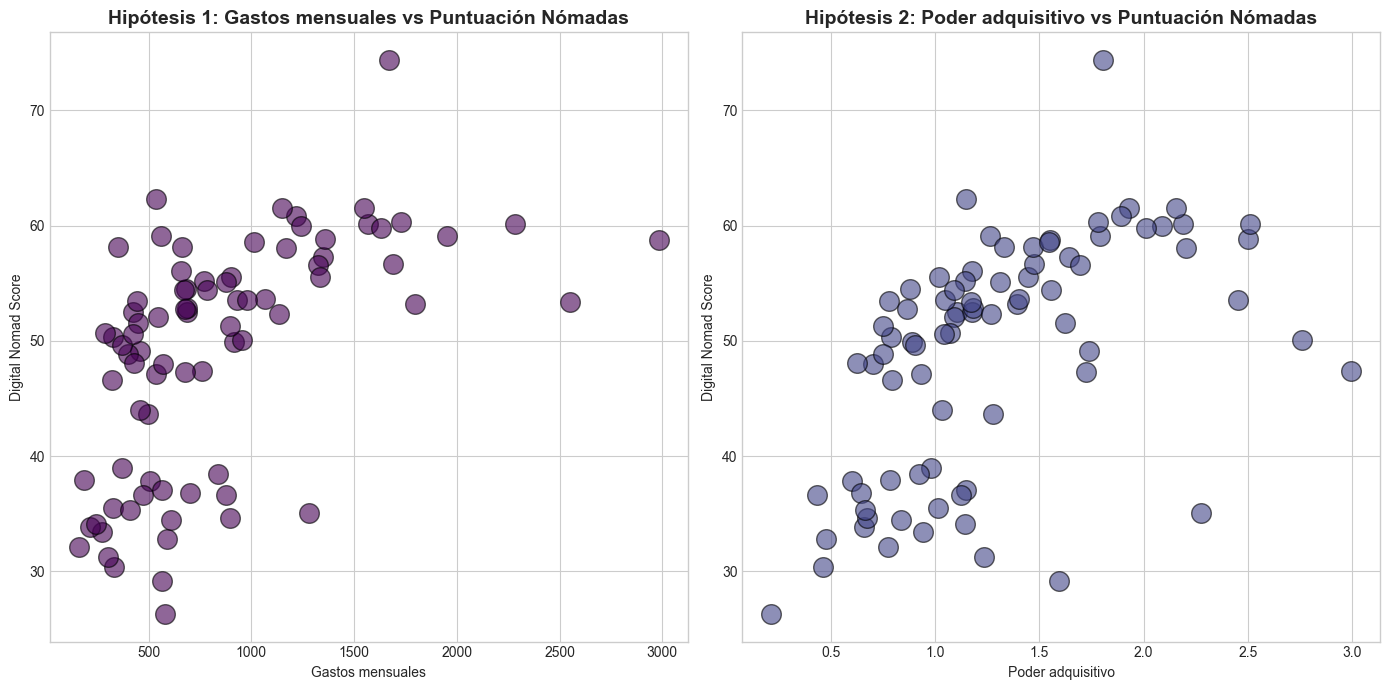

In [82]:
# Scatter plots: usamos esta visualización para hacer análisis bivariante y confirmar correlaciones: 
# 1. Coste de vida promedio vs Puntuación de Nómadas digitales a destinos concretos
# 2. Poder adquisitivo vs Puntuación de Nómadas digitales a destinos concretos

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Scatter plot 1: gastos mensuales contra puntuación de destinos por nómadas digitales

axes[0].scatter(
    df_cost_circleloop['monthly_nomad_cost'],
    df_cost_circleloop['digital_nomad_score'],
    c='#440154',
    alpha=0.6,
    edgecolors='black',
    s=200
)
axes[0].set_xlabel('Gastos mensuales')
axes[0].set_ylabel('Digital Nomad Score')
axes[0].set_title('Hipótesis 1: Gastos mensuales vs Puntuación Nómadas', fontsize=14, fontweight='bold')

# Scatter plot 2: poder adquisitivo contra puntuación de destinos por nómadas digitales

axes[1].scatter(
    df_cost_circleloop['local_purchasing_power'],
    df_cost_circleloop['digital_nomad_score'],
    c='#414487',
    alpha=0.6,
    edgecolors='black',
    s=200
)
axes[1].set_xlabel('Poder adquisitivo')
axes[1].set_ylabel('Digital Nomad Score')
axes[1].set_title('Hipótesis 2: Poder adquisitivo vs Puntuación Nómadas', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

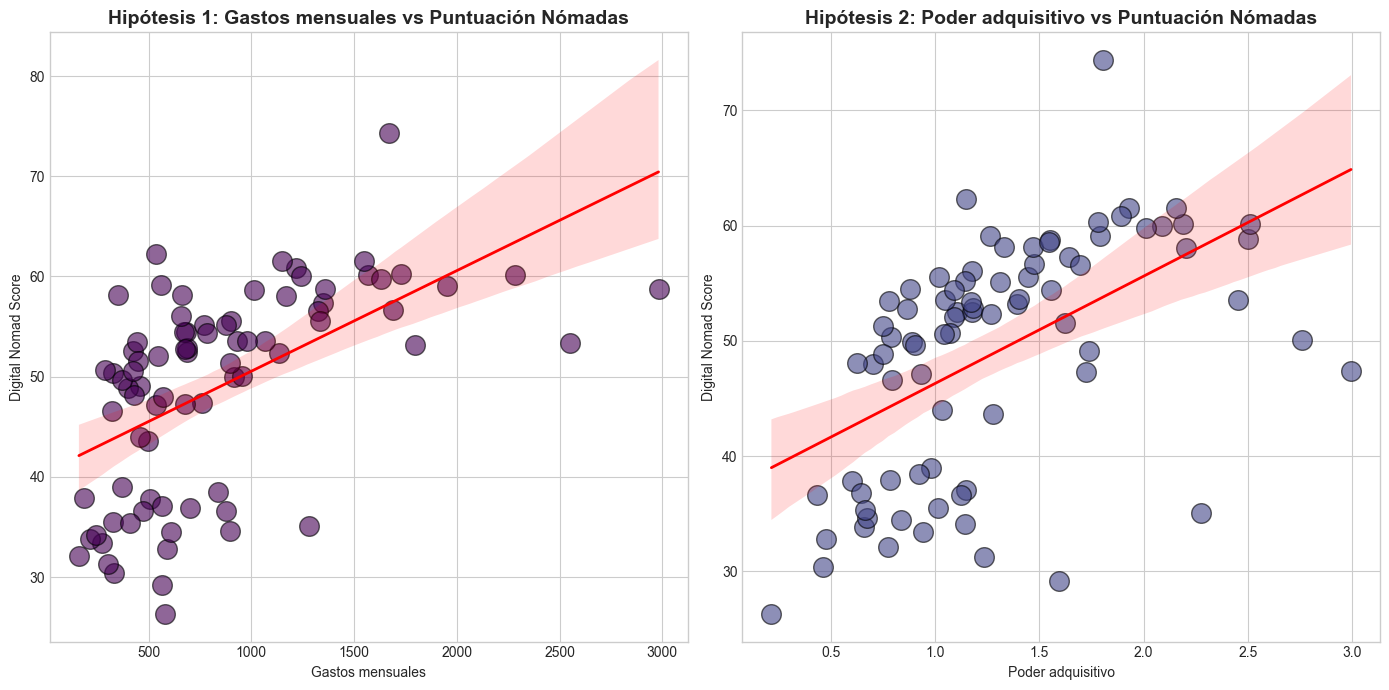

In [98]:
# Mismos scatters plot pero con líneas de tendencia para ver la correlación: 
# 1. Coste de vida promedio vs Puntuación de Nómadas digitales a destinos concretos
# 2. Poder adquisitivo vs Puntuación de Nómadas digitales a destinos concretos

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Scatter plot 1: gastos mensuales contra puntuación de destinos por nómadas digitales

sns.regplot(
    data=df_cost_circleloop,
    x='monthly_nomad_cost',
    y='digital_nomad_score',
    ax=axes[0],
    scatter_kws={
        'color': '#440154',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes[0].set_xlabel('Gastos mensuales')
axes[0].set_ylabel('Digital Nomad Score')
axes[0].set_title('Hipótesis 1: Gastos mensuales vs Puntuación Nómadas', fontsize=14, fontweight='bold')

# Scatter plot 2: poder adquisitivo contra puntuación de destinos por nómadas digitales

sns.regplot(
    data=df_cost_circleloop,
    x='local_purchasing_power',
    y='digital_nomad_score',
    ax=axes[1],
    scatter_kws={
        'color': '#414487',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes[1].set_xlabel('Poder adquisitivo')
axes[1].set_ylabel('Digital Nomad Score')
axes[1].set_title('Hipótesis 2: Poder adquisitivo vs Puntuación Nómadas', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


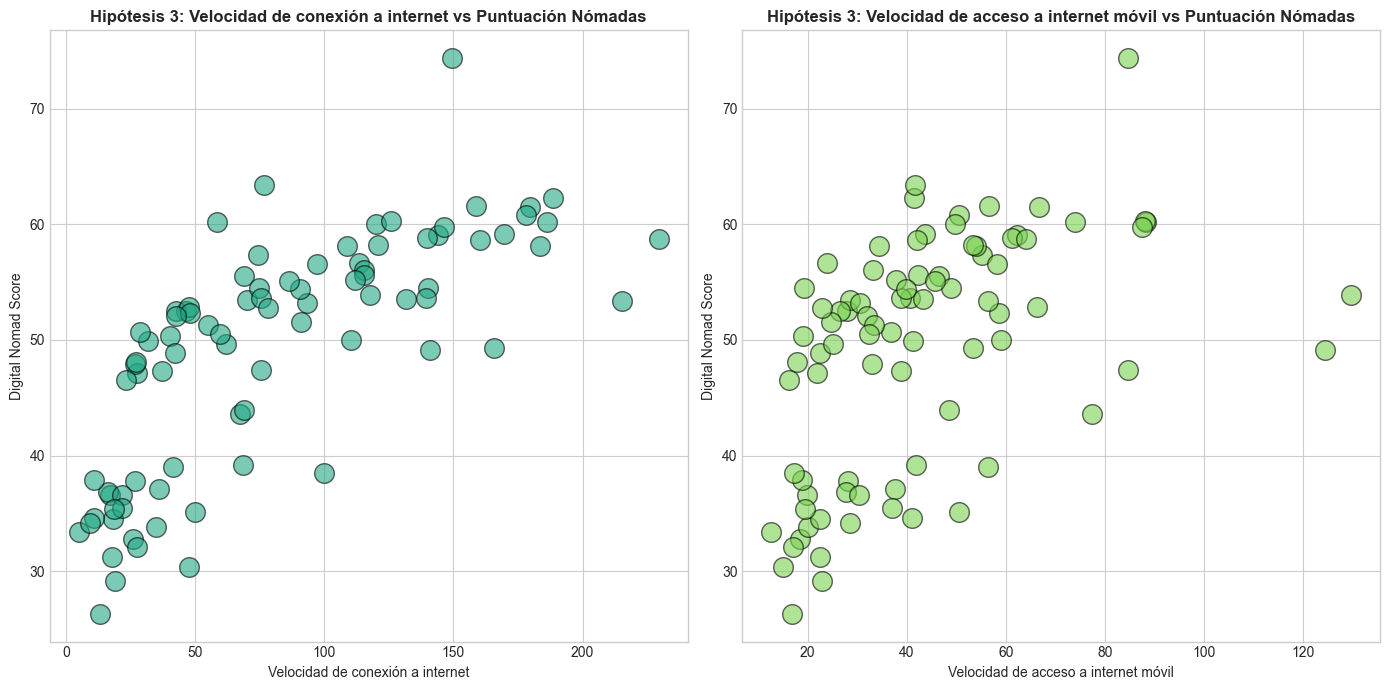

In [88]:
# Scatter plots: usamos esta visualización para hacer análisis bivariante y confirmar correlaciones: 
# 1. Velocidad de conexión a internet vs Puntuación de Nómadas digitales a destinos concretos
# 2. Velocidad de acceso a internet móvil vs Puntuación de Nómadas digitales a destinos concretos

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Scatter plot 1: velocidad de conexión a internet vs puntuación de Nómadas digitales a destinos concretos

axes[0].scatter(
    df_cost_circleloop['broadband_speed_mbps'],
    df_cost_circleloop['digital_nomad_score'],
    c='#22A884',
    alpha=0.6,
    edgecolors='black',
    s=200
)
axes[0].set_xlabel('Velocidad de conexión a internet')
axes[0].set_ylabel('Digital Nomad Score')
axes[0].set_title('Hipótesis 3: Velocidad de conexión a internet vs Puntuación Nómadas', fontsize=12, fontweight='bold')

# Scatter plot 2: velocidad de acceso a internet móvil vs puntuación de Nómadas digitales a destinos concretos

axes[1].scatter(
    df_cost_circleloop['mobile_speed_mbps'],
    df_cost_circleloop['digital_nomad_score'],
    c='#7AD151',
    alpha=0.6,
    edgecolors='black',
    s=200
)
axes[1].set_xlabel('Velocidad de acceso a internet móvil')
axes[1].set_ylabel('Digital Nomad Score')
axes[1].set_title('Hipótesis 3: Velocidad de acceso a internet móvil vs Puntuación Nómadas', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

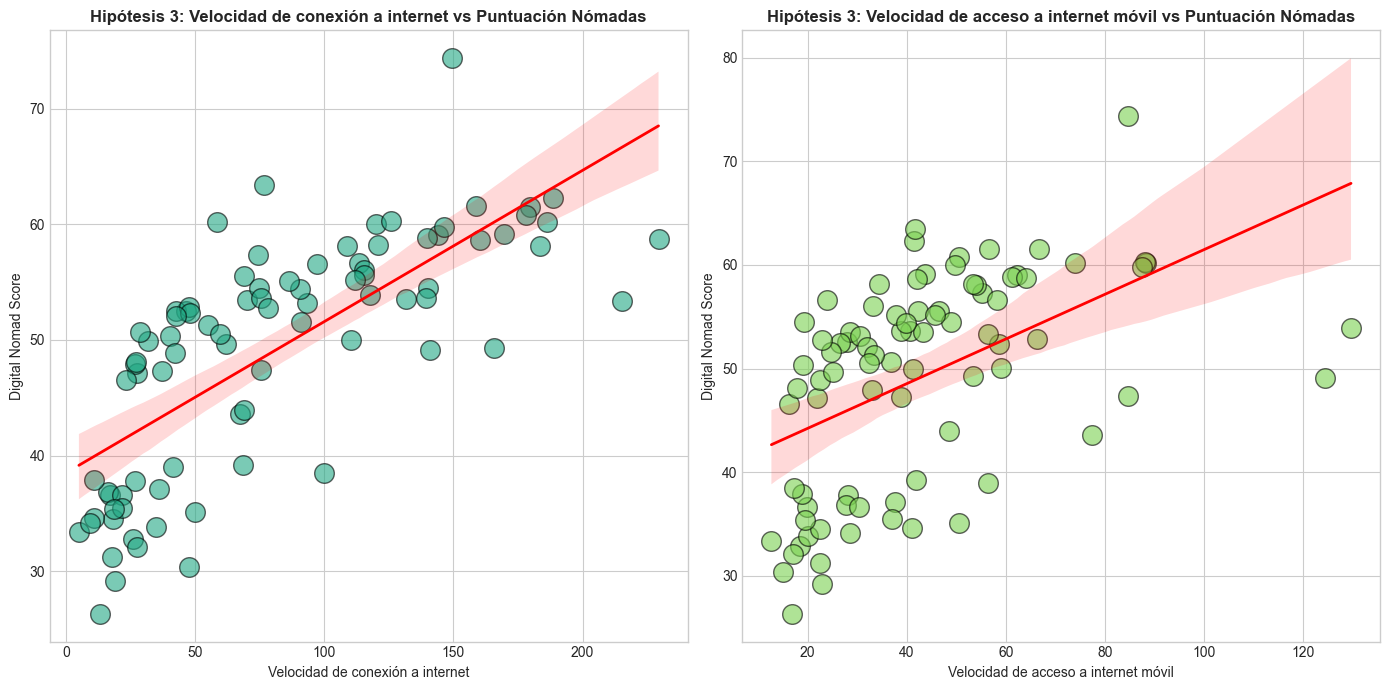

In [99]:
# Mismos scatters plot pero con línea de tendencia que representa el coeficiente de Pearson: 
# 1. Velocidad de conexión a internet vs Puntuación de Nómadas digitales a destinos concretos
# 2. Velocidad de acceso a internet móvil vs Puntuación de Nómadas digitales a destinos concretos

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Scatter plot 1: velocidad de conexión a internet vs puntuación de Nómadas digitales a destinos concretos

sns.regplot(
    data=df_cost_circleloop,
    x='broadband_speed_mbps',
    y='digital_nomad_score',
    ax=axes[0],
    scatter_kws={
        'color': '#22A884',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes[0].set_xlabel('Velocidad de conexión a internet')
axes[0].set_ylabel('Digital Nomad Score')
axes[0].set_title('Hipótesis 3: Velocidad de conexión a internet vs Puntuación Nómadas', fontsize=12, fontweight='bold')

# Scatter plot 2: velocidad de acceso a internet móvil vs puntuación de Nómadas digitales a destinos concretos

sns.regplot(
    data=df_cost_circleloop,
    x='mobile_speed_mbps',
    y='digital_nomad_score',
    ax=axes[1],
    scatter_kws={
        'color': '#7AD151',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes[1].set_xlabel('Velocidad de acceso a internet móvil')
axes[1].set_ylabel('Digital Nomad Score')
axes[1].set_title('Hipótesis 3: Velocidad de acceso a internet móvil vs Puntuación Nómadas', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


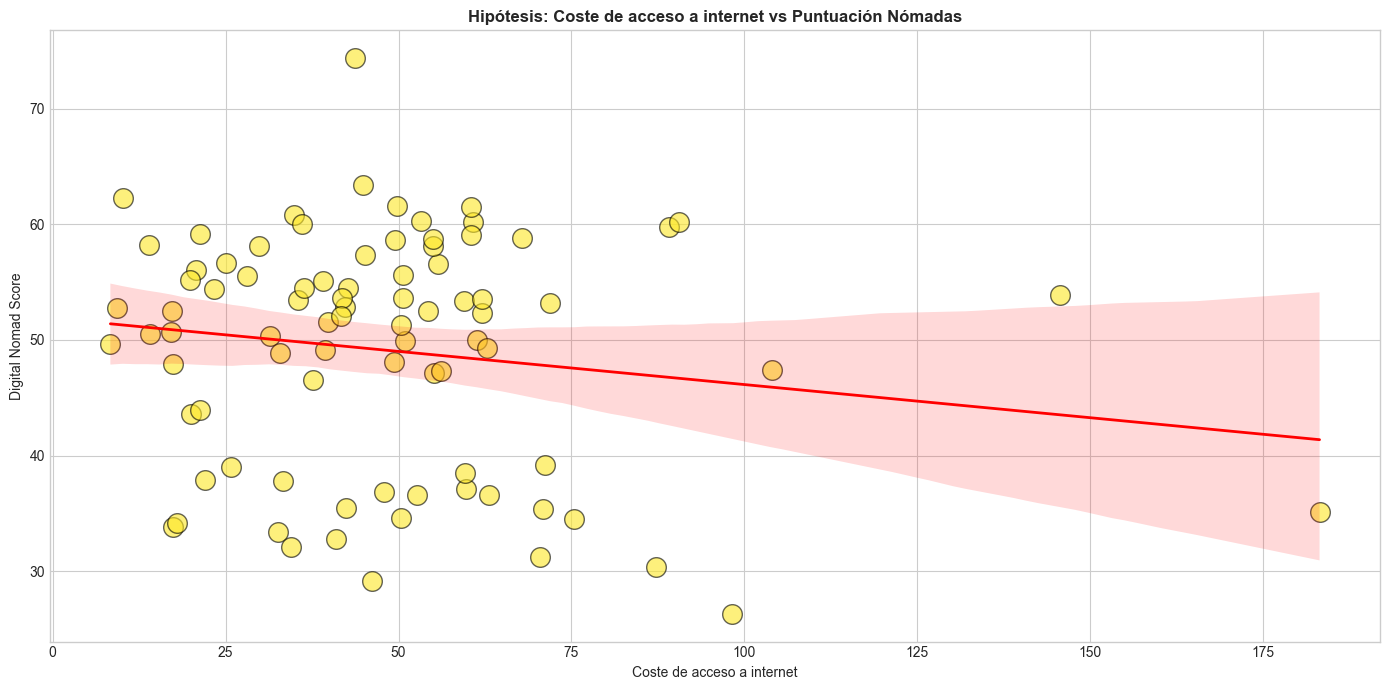

In [104]:
fig, axes = plt.subplots(1, 1, figsize=(14, 7))

# Scatter plot 2: Coste de internet vs puntuación de Nómadas digitales a destinos concretos

sns.regplot(
    data=df_cost_circleloop,
    x='broadband_cost',
    y='digital_nomad_score',
    ax=axes,
    scatter_kws={
        'color': '#FDE725',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes.set_xlabel('Coste de acceso a internet')
axes.set_ylabel('Digital Nomad Score')
axes.set_title('Hipótesis: Coste de acceso a internet vs Puntuación Nómadas', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### **5. Hipótesis secundarias**

##### **Hipótesis 4: la variable vivienda --> ¿el alquiler de vivienda es una razón determinante por encima de alimentación?**

**Correlaciones muy positivas**: el gasto de salir a comer fuera de casa --> pesa el gasto en coworkings o reuniones de trabajo. 

**Correlaciones positivas pero menos**: alquiler mensual y cesta de la compra. 

**Correlaciones negativas**: porcentaje de gasto de salario en pago de vivienda (alquiler)


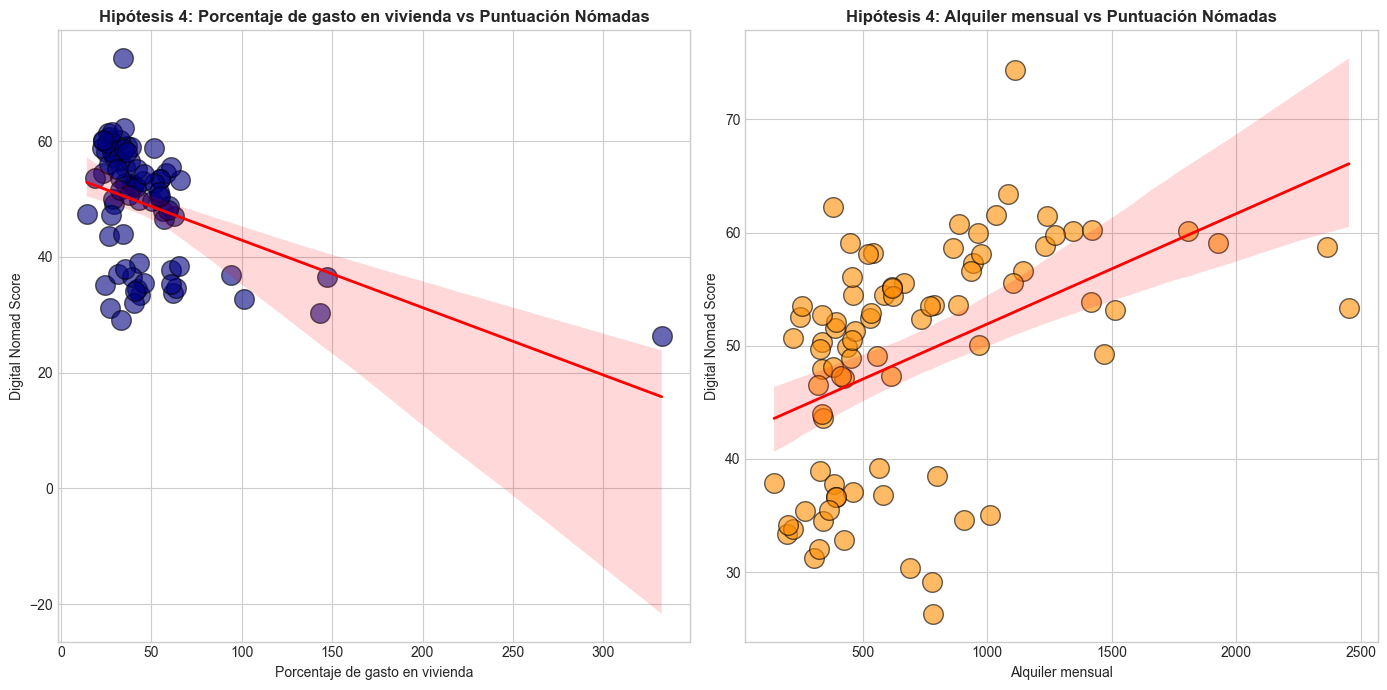

In [106]:
# Scatters plot con líneas de tendencia (coeficiente de Pearson) para ver correlaciones: 
# 1. Porcentaje de gasto en vivienda vs Puntuación de Nómadas digitales a destinos concretos
# 2. Alquiler mensual vs Puntuación de Nómadas digitales a destinos concretos

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Scatter plot 1: Porcentaje de gasto en vivienda vs puntuación de Nómadas digitales a destinos concretos

sns.regplot(
    data=df_cost_circleloop,
    x='housing_salary_ratio',
    y='digital_nomad_score',
    ax=axes[0],
    scatter_kws={
        'color': 'navy',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes[0].set_xlabel('Porcentaje de gasto en vivienda')
axes[0].set_ylabel('Digital Nomad Score')
axes[0].set_title('Hipótesis 4: Porcentaje de gasto en vivienda vs Puntuación Nómadas', fontsize=12, fontweight='bold')

# Scatter plot 2: Alquiler mensual vs puntuación de Nómadas digitales a destinos concretos

sns.regplot(
    data=df_cost_circleloop,
    x='monthly_rent',
    y='digital_nomad_score',
    ax=axes[1],
    scatter_kws={
        'color':'darkorange',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes[1].set_xlabel('Alquiler mensual')
axes[1].set_ylabel('Digital Nomad Score')
axes[1].set_title('Hipótesis 4: Alquiler mensual vs Puntuación Nómadas', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

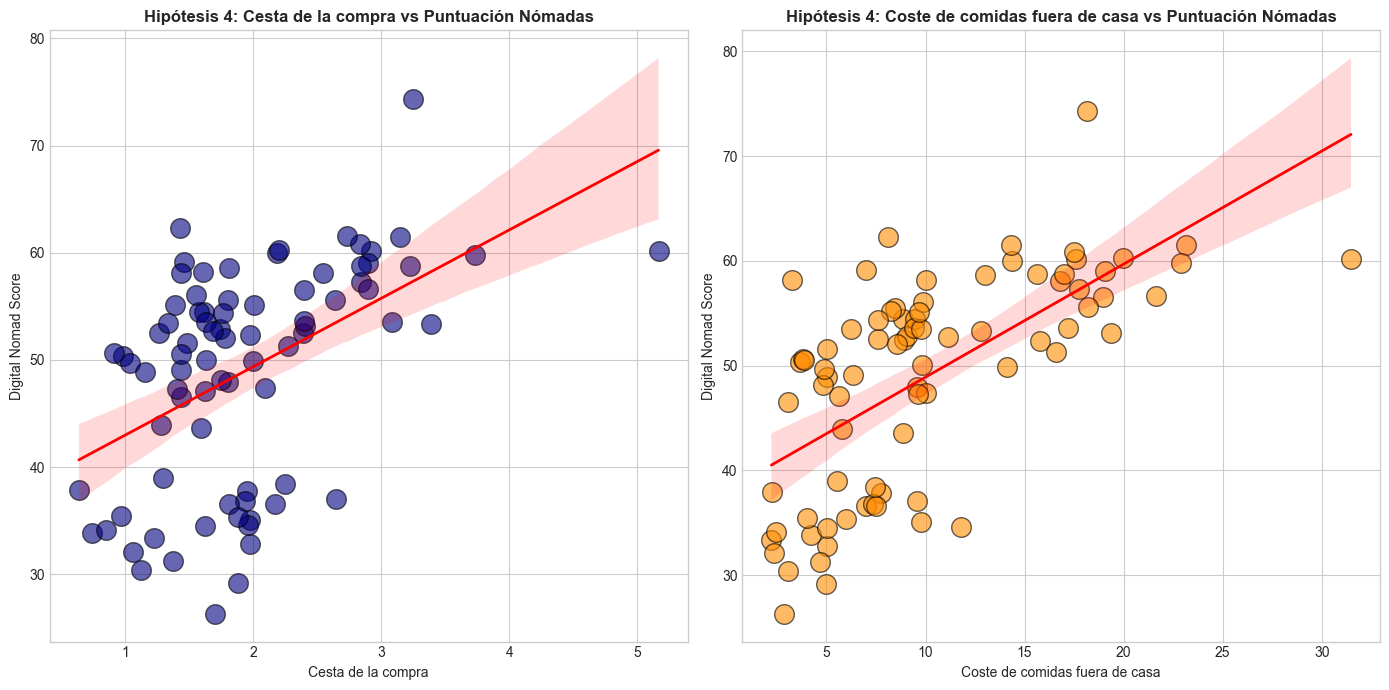

In [109]:
# Scatters plot con líneas de tendencia (coeficiente de Pearson) para ver correlaciones: 
# 1. Cesta de la compra vs Puntuación de Nómadas digitales a destinos concretos
# 2. Coste dedicado a comer fuera de casa vs Puntuación de Nómadas digitales a destinos concretos

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Scatter plot 1: Cesta de la compra vs puntuación de Nómadas digitales a destinos concretos

sns.regplot(
    data=df_cost_circleloop,
    x='basic_basket_index',
    y='digital_nomad_score',
    ax=axes[0],
    scatter_kws={
        'color': 'navy',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes[0].set_xlabel('Cesta de la compra')
axes[0].set_ylabel('Digital Nomad Score')
axes[0].set_title('Hipótesis 4: Cesta de la compra vs Puntuación Nómadas', fontsize=12, fontweight='bold')

# Scatter plot 2: Coste dedicado a comer fuera de casa vs puntuación de Nómadas digitales a destinos concretos

sns.regplot(
    data=df_cost_circleloop,
    x='daily_meal_cost',
    y='digital_nomad_score',
    ax=axes[1],
    scatter_kws={
        'color': 'darkorange',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes[1].set_xlabel('Coste de comidas fuera de casa')
axes[1].set_ylabel('Digital Nomad Score')
axes[1].set_title('Hipótesis 4: Coste de comidas fuera de casa vs Puntuación Nómadas', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### **Hipótesis 5: más por menos --> ¿hay países que ofrecen mejores condiciones generales por menos coste mensual?**

- Existe correlación positiva pero no es especialmente fuerte. 

#### **Hipótesis 6: bienestar social --> ¿los países con buen índice de felicidad atraen más nómadas digitales?**

- Es posiblemente la variable que mayor correlación positiva experimenta junto a la velocidad de conexión a internet. 
- Elemento determinante para la puntuación que dan los nómadas digitales a los destinos de los ránkings. 



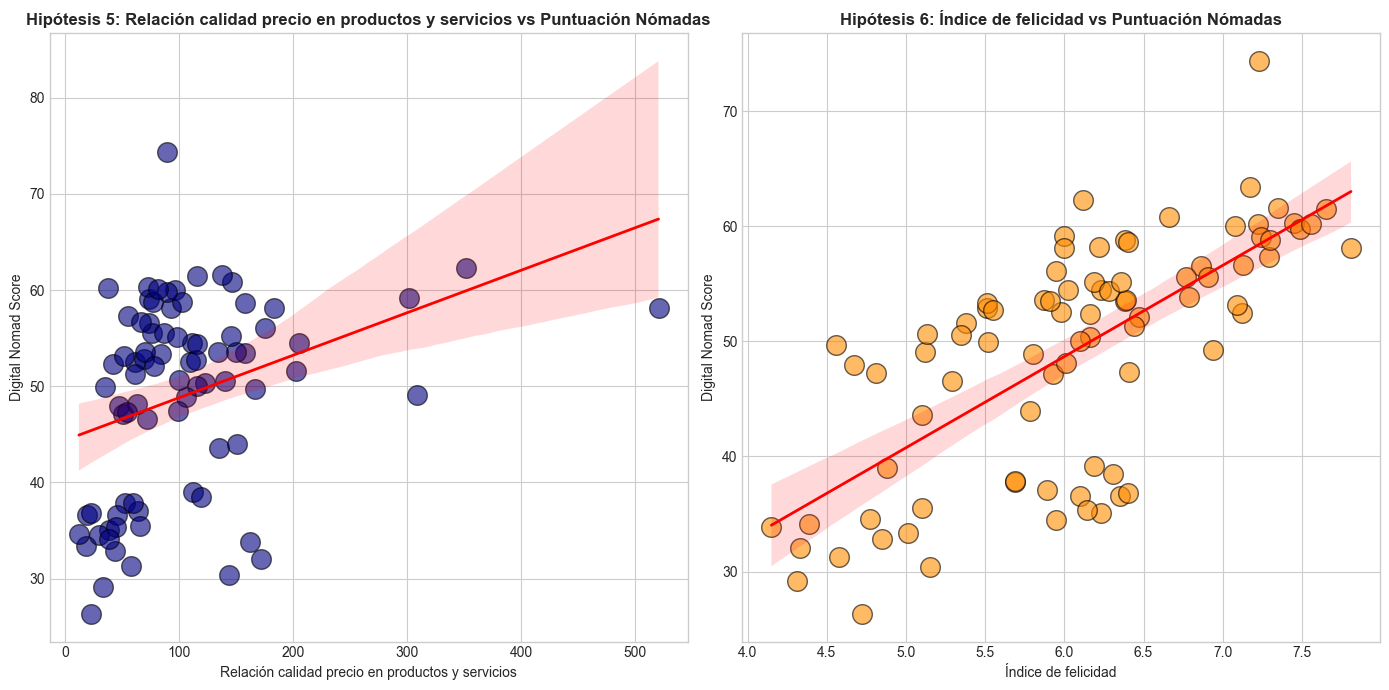

In [111]:
# Scatters plot con líneas de tendencia (coeficiente de Pearson) para ver correlaciones: 
# 1. Relación calidad precio en productos y servicios vs Puntuación de Nómadas digitales a destinos concretos
# 2. Índice de felicidad vs Puntuación de Nómadas digitales a destinos concretos

fig, axes = plt.subplots(1, 2, figsize=(14, 7))


# Incluimos una nueva variable agregada que calcula coste prioritario (internet) vs coste mensual promedio. 

df_cost_circleloop['value_for_money'] = (
    df_cost_circleloop['broadband_speed_mbps'] / 
    df_cost_circleloop['monthly_nomad_cost'] * 1000
    )


# Scatter plot 1: Relación calidad precio en productos y serviciosa vs puntuación de Nómadas digitales a destinos concretos

sns.regplot(
    data=df_cost_circleloop,
    x='value_for_money',
    y='digital_nomad_score',
    ax=axes[0],
    scatter_kws={
        'color': 'navy',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes[0].set_xlabel('Relación calidad precio en productos y servicios')
axes[0].set_ylabel('Digital Nomad Score')
axes[0].set_title('Hipótesis 5: Relación calidad precio en productos y servicios vs Puntuación Nómadas', fontsize=12, fontweight='bold')

# Scatter plot 2: Índice de felicidad vs puntuación de Nómadas digitales a destinos concretos

sns.regplot(
    data=df_cost_circleloop,
    x='happiness_index',
    y='digital_nomad_score',
    ax=axes[1],
    scatter_kws={
        'color': 'darkorange',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes[1].set_xlabel('Índice de felicidad')
axes[1].set_ylabel('Digital Nomad Score')
axes[1].set_title('Hipótesis 6: Índice de felicidad vs Puntuación Nómadas', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### **Hipótesis 8: seguridad --> ¿la seguridad es un elemento decisivo en la elección, incluso con costes elevados?**

- Variable totalmente irrelevante a la hora de escoger destino para los nómadas digitales

#### **Hipótesis 9: facilidad de visado --> ¿la accesibilidad legal es una variable que afecta al ránking de destinos?**

- Correlación positiva en el caso de facilidad para conseguir el visado. 

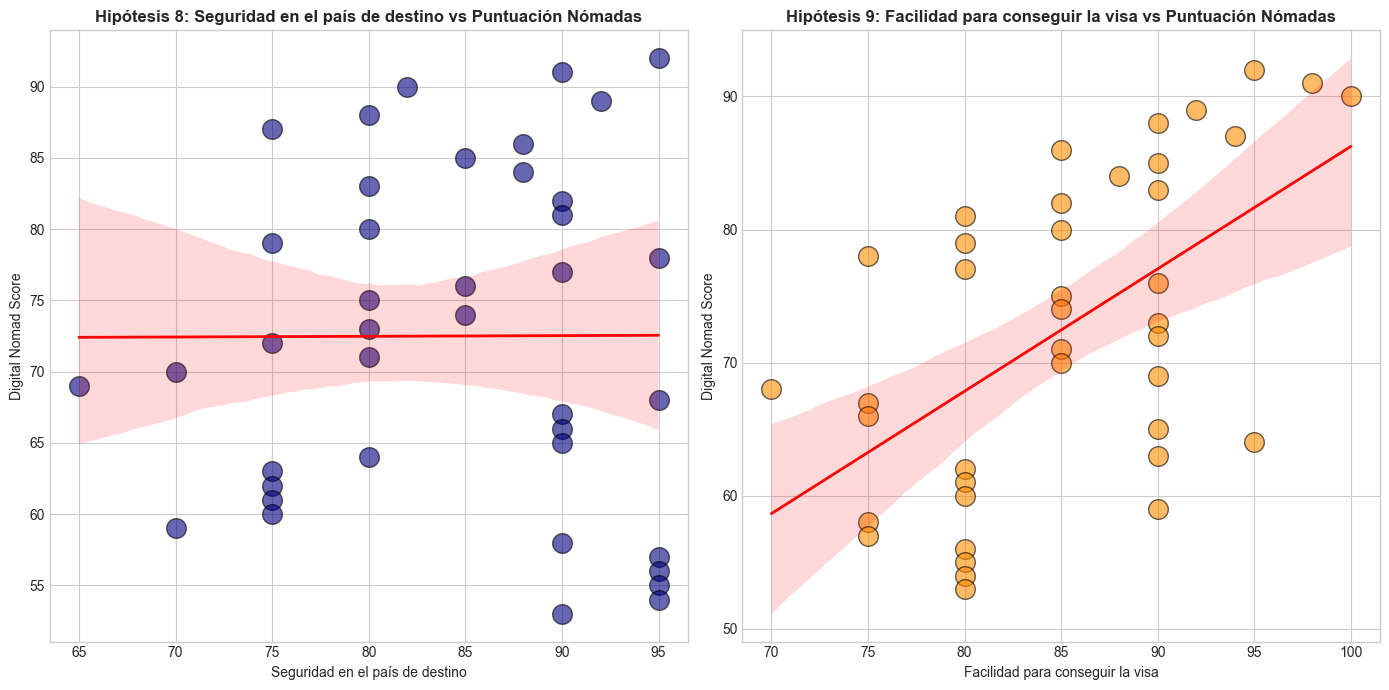

In [119]:
# Scatters plot con líneas de tendencia (coeficiente de Pearson) para ver correlaciones: 
# 1. Seguridad en el país de destino vs Puntuación de Nómadas digitales a destinos concretos
# 2. Facilidad para conseguir la visa vs Puntuación de Nómadas digitales a destinos concretos

fig, axes = plt.subplots(1, 2, figsize=(14, 7))


# Scatter plot 1: Seguridad en el país de destino vs puntuación de Nómadas digitales a destinos concretos

sns.regplot(
    data=df_movingto,
    x='safety',
    y='overall_score',
    ax=axes[0],
    scatter_kws={
        'color': 'navy',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes[0].set_xlabel('Seguridad en el país de destino')
axes[0].set_ylabel('Digital Nomad Score')
axes[0].set_title('Hipótesis 8: Seguridad en el país de destino vs Puntuación Nómadas', fontsize=12, fontweight='bold')

# Scatter plot 2: Facilidad para conseguir la visa vs puntuación de Nómadas digitales a destinos concretos

sns.regplot(
    data=df_movingto,
    x='visa_ease',
    y='overall_score',
    ax=axes[1],
    scatter_kws={
        'color': 'darkorange',
        'alpha': 0.6,
        'edgecolors': 'black',
        's': 200
    },
    line_kws={'color': 'red', 'linewidth': 2} 
)
axes[1].set_xlabel('Facilidad para conseguir la visa')
axes[1].set_ylabel('Digital Nomad Score')
axes[1].set_title('Hipótesis 9: Facilidad para conseguir la visa vs Puntuación Nómadas', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [124]:
print("Resumen de correlaciones y confirmaciones de hipótesis planteadas en el EDA")
print("---------------------------------------------------------------------------------------------------")
print("✅ Hipótesis 1: xxxxxxxxxxxxxxxxxxxx")
print("✅ Hipótesis 2: A mayor poder adquisitivo mejora la nota dada al país por parte de los nómadas")
print("✅ Hipótesis 3: A mayor velocidad de acceso a internet, mejor el puesto en el ránking nómada")
print("❌ Hipótesis 4: El coste en vivienda no es relevante. Comer fuera o el gasto en la cesta prevalecen")
print("✅ Hipótesis 5: Mejor relación calidad precio de productos y servicios correla positivamente")
print("✅ Hipótesis 6: Sí, los nómadas digitales se fijan en el índice de felicidad de los países")
print(" Hipótesis 7: xxxxxxxxxxxxxxxxxxxxxxxx")
print("❌ Hipótesis 8: La seguridad en el país de destino no es un elemento clave para el ránking")
print("✅ Hipótesis 9: La facilidad para conseguir la visa, en cambio, sí lo es")
print("----------------------------------------------------------------------------------------------------")

Resumen de correlaciones y confirmaciones de hipótesis planteadas en el EDA
---------------------------------------------------------------------------------------------------
✅ Hipótesis 1: xxxxxxxxxxxxxxxxxxxx
✅ Hipótesis 2: A mayor poder adquisitivo mejora la nota dada al país por parte de los nómadas
✅ Hipótesis 3: A mayor velocidad de acceso a internet, mejor el puesto en el ránking nómada
❌ Hipótesis 4: El coste en vivienda no es relevante. Comer fuera o el gasto en la cesta prevalecen
✅ Hipótesis 5: Mejor relación calidad precio de productos y servicios correla positivamente
✅ Hipótesis 6: Sí, los nómadas digitales se fijan en el índice de felicidad de los países
 Hipótesis 7: xxxxxxxxxxxxxxxxxxxxxxxx
❌ Hipótesis 8: La seguridad en el país de destino no es un elemento clave para el ránking
✅ Hipótesis 9: La facilidad para conseguir la visa, en cambio, sí lo es
----------------------------------------------------------------------------------------------------
